In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from glob import glob
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

After importing all necessary modules, I'll load all dataset seperately (each stands for a specific Indian state). Maybe in some states there are far less or more Null values than in others. In that case I would consider to use only some states.

In [2]:
indians = [pd.read_csv(f) for f in glob('Mortality_*.csv')]

/home/florian/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (1,3,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,106,107,108,109,110,111,112,113,114,115,116,117) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/home/florian/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (1,2,3,11,14,16,17,18,22,23,24,25,26,27,28,29,30,31,32,33,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,106,107,108,109,110,111,112,113,114,115,116,117) have mixed types. Specify dtype opti

In [3]:
for df in indians:
    print(len(df), df.isnull().sum().sum()/(len(df)*122))

191589 0.26269779682926114
94619 0.31619511486879476
59062 0.30064724981972263
90744 0.29955600189616477
44251 0.2968524190061834
107238 0.29445390198421834
71003 0.28764820142672337
57573 0.31203891396040895
53503 0.23588427552553357


Apparently, there are no dataframes (indian states) with far more or far less None values than others. Thus I will work with all of them and now concatenate all of those dataframes into one single dataframe ('indians'). Furthermore I will change None values to -1.

In [4]:
indians = pd.concat(indians).reset_index()

In [5]:
indians.head()


,index,id,m_id,client_m_id,hl_id,house_no,house_hold_no,state,district,rural,stratum_code,psu_id,m_serial_no,deceased_sex,date_of_death,month_of_death,year_of_death,age_of_death_below_one_month,age_of_death_below_eleven_month,age_of_death_above_one_year,treatment_source,place_of_death,is_death_reg,is_death_certificate_received,serial_num_of_infant_mother,order_of_birth,death_symptoms,is_death_associated_with_pregnan,death_period,months_of_pregnancy,factors_contributing_death,factors_contributing_death_2,symptoms_of_death,time_between_onset_of_complicati,nearest_medical_facility,m_expall_status,field38,hh_id,client_hh_id,currently_dead_or_out_migrated,hh_serial_no,sex,usual_residance,relation_to_head,member_identity,father_serial_no,mother_serial_no,date_of_birth,month_of_birth,year_of_birth,age,religion,social_group_code,marital_status,date_of_marriage,month_of_marriage,year_of_marriage,currently_attending_school,reason_for_not_attending_school,highest_qualification,occupation_status,disability_status,injury_treatment_type,illness_type,symptoms_pertaining_illness,sought_medical_care,diagnosed_for,diagnosis_source,regular_treatment,regular_treatment_source,chew,smoke,alcohol,status,hh_expall_status,client_hl_id,serial_no,building_no,house_status,house_structure,owner_status,drinking_water_source,is_water_filter,water_filteration,toilet_used,is_toilet_shared,household_have_electricity,lighting_source,cooking_fuel,no_of_dwelling_rooms,kitchen_availability,is_radio,is_television,is_computer,is_telephone,is_washing_machine,is_refrigerator,is_sewing_machine,is_bicycle,is_scooter,is_car,is_tractor,is_water_pump,cart,land_possessed,hl_expall_status,fid,isdeadmigrated,residancial_status,iscoveredbyhealthscheme,healthscheme_1,healthscheme_2,housestatus,householdstatus,isheadchanged,fidh,fidx,as,wt,x,schedule_id,year,v126
0,0,712232,375,NaN,2944,63,3,9,58,1.0,1,100270529,4,1,10.0,11,2008.0,0,0,80,0,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,13141,NaN,2,1,1,1,1,314,NaN,NaN,0,0,1966,43,1,3,3,0,5,1990,NaN,NaN,4,7,0,0,0,11,NaN,0,0,NaN,0,7,4,4,0,1,NaN,77,0,1,1,1,3,2,NaN,0,NaN,1,1,3,2,4,2,2,3,2,2,2,2,1,2,2,2,1,4,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9441e+10,-0.630351,68.37,NaN,4,1,NaN
1,1,712240,383,NaN,2997,28,1,9,58,1.0,1,100269231,5,1,13.0,12,2007.0,0,0,70,9,3,1.0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,13325,NaN,2,1,2,1,1,104,NaN,NaN,0,0,1939,70,1,3,5,0,0,1952,NaN,NaN,0,16,0,0,3,5,2,21,8,2,8,5,4,4,0,1,NaN,32,0,1,1,1,3,2,NaN,0,NaN,2,2,2,2,2,2,2,3,4,2,2,2,2,2,2,2,1,4,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9971e+10,-4.36921,68.37,NaN,4,1,NaN
2,2,109886,246,NaN,NaN,58,1,9,62,1.0,2,100281885,1,1,30.0,7,2011.0,0,0,87,0,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,40051,NaN,2,2,2,1,1,277,NaN,NaN,6,12,1954,57,1,1,3,0,6,1974,NaN,NaN,3,2,0,0,0,99,NaN,0,0,NaN,0,7,4,4,0,1,NaN,62,0,1,1,1,3,2,NaN,0,NaN,1,2,3,4,2,1,2,3,2,2,2,2,1,2,2,2,2,4,2,1,9.620340e+11,NaN,1,2,0,0,1,1,1,9.62034e+13,NaN,NaN,20.95,NaN,4,3,NaN
3,3,712216,359,NaN,2706,196,1,9,58,1.0,1,100268481,38,2,0.0,5,2009.0,0,0,90,9,1,1.0,2,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,12090,NaN,2,1,1,1,1,876,NaN,NaN,0,0,1959,50,1,3,5,0,4,1970,NaN,NaN,0,3,0,0,0,11,NaN,0,0,NaN,0,1,1,1,0,1,NaN,228,0,1,1,1,3,2,NaN,0,NaN,2,2,3,3,1,2,2,3,4,2,2,2,1,2,2,2,2,4,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7061e+10,-2.99654,68.37,NaN,4,1,NaN
4,4,712224,367,NaN,2777,253,1,9,58,1.0,1,100268463,41,2,0.0,5,2008.0,6,0,0,0,1,2.0,0,2,3,3,0,0,0,0,0,0,0,0,NaN,NaN,12440,NaN,2,1,2,1,1,1218,NaN,NaN,0,0,1944,65,1,3,5,0,0,1954,NaN,NaN,0,15,0,0,0,4,2,19,8,2,8,7,4,4,0,1,NaN,299,0,1,1,1,3,2,NaN,0,NaN,2,2,2,1,4,2,2,3,2,2,2,2,1,2,2,2,2,4,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7771e+10,-3.95114,68.37,NaN,4,1,NaN


In [6]:
indians.isnull().sum()

index                                    0
id                                       0
m_id                                 49692
client_m_id                         365714
hl_id                               279471
house_no                                 0
house_hold_no                            0
state                                    0
district                                 0
rural                                   12
stratum_code                             0
psu_id                                   0
m_serial_no                          35023
deceased_sex                             0
date_of_death                         4921
month_of_death                         488
year_of_death                           31
age_of_death_below_one_month        593900
age_of_death_below_eleven_month     634014
age_of_death_above_one_year         118694
treatment_source                     20604
place_of_death                       10535
is_death_reg                         10473
is_death_ce

In [7]:
indians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769582 entries, 0 to 769581
Columns: 123 entries, index to v126
dtypes: float64(9), int64(11), object(103)
memory usage: 722.2+ MB


In [8]:
indians.fillna(-1, inplace=True)

In [9]:
indians['alcohol'].value_counts()

4.0    435843
2.0    105636
4      104799
-1      39422
1.0     39167
2       18708
3.0     10987
1        5376
0.0      4862
3        2403
0        2196
          168
6          13
6.0         2
Name: alcohol, dtype: int64

In [10]:
indians.replace(' ', -1, inplace=True)

In [11]:
indians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769582 entries, 0 to 769581
Columns: 123 entries, index to v126
dtypes: float64(9), int64(12), object(102)
memory usage: 722.2+ MB


The most important columns are those I will be able to use for calculating the age a person in the dataset died. Thus, I have to analyse the columns 'date_of_death', 'month_of_death', 'year_of_death','date_of_birth', 'month_of_birth' and 'year_of_birth'. Dates that are higher than 31 or less than 1, months that are higher than 12 or lower than 1 and years that are higher than 2013 or lower than lets say 1870 must be wrong. I flag them as None (-1).

In [12]:
indians['date_of_death']

0         10.0
1         13.0
2         30.0
3          0.0
4          0.0
5          0.0
6         25.0
7         27.0
8          0.0
9         13.0
10         6.0
11         0.0
12         0.0
13        26.0
14        16.0
15         8.0
16        13.0
17         0.0
18         0.0
19        16.0
20         0.0
21         0.0
22        18.0
23         0.0
24         7.0
25        26.0
26        21.0
27        20.0
28         0.0
29         0.0
30        15.0
31         0.0
32        25.0
33         9.0
34         9.0
35         7.0
36        26.0
37         4.0
38         0.0
39        11.0
40         6.0
41         7.0
42         0.0
43         0.0
44         0.0
45         0.0
46         0.0
47         0.0
48         6.0
49         0.0
50         0.0
51         0.0
52        21.0
53         0.0
54        25.0
55         0.0
56         8.0
57         7.0
58         0.0
59         0.0
60        17.0
61         0.0
62         8.0
63        26.0
64         8.0
65         2.0
66        

In [13]:
indians['month_of_death']

0         11
1         12
2          7
3          5
4          5
5          2
6          8
7          8
8          1
9          2
10        11
11        10
12        11
13         2
14        12
15         2
16         3
17         9
18         8
19         5
20         4
21         6
22        12
23         6
24         4
25        10
26        12
27         6
28        10
29         5
30        10
31         8
32        12
33         7
34         5
35         8
36         5
37         2
38        12
39         3
40        12
41         1
42         8
43         1
44         2
45        10
46         3
47        11
48         8
49         3
50        10
51         0
52        11
53         3
54        12
55         1
56        10
57         1
58         3
59         7
60         7
61         4
62         9
63         7
64         1
65         2
66         7
67        10
68         2
69        10
70         5
71         4
72         1
73         6
74         4
75         4
76        11

In [14]:
indians2 = indians.astype(int, errors='ignore', inplace=True)

In [15]:
indians2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769582 entries, 0 to 769581
Columns: 123 entries, index to v126
dtypes: int64(21), object(102)
memory usage: 722.2+ MB


In [16]:
for col in ['month_of_death','month_of_birth','date_of_death','date_of_birth','year_of_death','year_of_birth']:
    indians2[col] = pd.to_numeric(indians2[col])

In [17]:
indians2[indians2['month_of_death']<13]['month_of_death'].value_counts()

 8.0     73639
 1.0     69222
 12.0    65552
 10.0    63559
 11.0    62577
 6.0     61771
 7.0     59965
 2.0     58486
 9.0     57615
 5.0     55490
 3.0     53737
 4.0     52506
 0.0     34574
-1.0       489
Name: month_of_death, dtype: int64

In [18]:
indians2['month_of_birth'].value_counts()

 0.0     491136
 6.0      29950
 4.0      28262
 5.0      27367
 7.0      26394
 3.0      24483
 1.0      24026
 2.0      22536
 8.0      22375
 9.0      17397
 10.0     17322
 12.0     13182
 11.0     12809
-1.0      12343
Name: month_of_birth, dtype: int64

In [19]:
indians2[['month_of_death','month_of_birth']] = indians2[['month_of_death','month_of_birth']].applymap(lambda x: -1 if x == 0 or x > 12 else x)

In [20]:
indians2['month_of_death'].value_counts()

 8.0     73639
 1.0     69222
 12.0    65552
 10.0    63559
 11.0    62577
 6.0     61771
 7.0     59965
 2.0     58486
 9.0     57615
 5.0     55490
 3.0     53737
 4.0     52506
-1.0     35463
Name: month_of_death, dtype: int64

In [21]:
indians2['month_of_birth'].value_counts()

-1.0     503479
 6.0      29950
 4.0      28262
 5.0      27367
 7.0      26394
 3.0      24483
 1.0      24026
 2.0      22536
 8.0      22375
 9.0      17397
 10.0     17322
 12.0     13182
 11.0     12809
Name: month_of_birth, dtype: int64

In [22]:
indians2['date_of_death'].value_counts()

 0      367973
 10      20471
 15      17913
 1       17533
 20      17415
 12      16229
 5       16128
 2       15749
 25      14253
 8       14105
 6       13485
 4       13442
 7       13217
 3       13215
 11      13188
 9       13059
 14      12945
 17      12300
 18      12072
 28      11796
 13      11747
 16      11679
 22      11607
 26      10934
 21      10819
 24      10178
 27      10115
 19       9680
 23       9440
 29       8638
 30       8406
-1        4921
 31       4889
 80          5
 60          5
 70          5
 90          3
 50          3
 110         3
 40          2
 91          2
 71          2
 32          1
 75          1
 88          1
 76          1
 61          1
 68          1
 55          1
 52          1
 45          1
 41          1
 51          1
Name: date_of_death, dtype: int64

In [23]:
indians2[['date_of_death','date_of_birth']] = indians2[['date_of_death','date_of_birth']].applymap(lambda x: -1 if x == 0 or x > 31 else x)

In [24]:
indians2['date_of_birth'].value_counts()

-1.0     629202
 1.0      13951
 15.0      9361
 10.0      8876
 12.0      8460
 5.0       6086
 20.0      5995
 2.0       5778
 11.0      5647
 18.0      4554
 17.0      4491
 3.0       4487
 4.0       4449
 25.0      4411
 7.0       4388
 16.0      4120
 6.0       4109
 21.0      4076
 14.0      4056
 8.0       3727
 13.0      3451
 22.0      3278
 9.0       3267
 19.0      3090
 24.0      2610
 28.0      2535
 27.0      2431
 26.0      2244
 30.0      2022
 23.0      2019
 29.0      1358
 31.0      1053
Name: date_of_birth, dtype: int64

In [25]:
indians2['date_of_death'].value_counts()

-1     372935
 10     20471
 15     17913
 1      17533
 20     17415
 12     16229
 5      16128
 2      15749
 25     14253
 8      14105
 6      13485
 4      13442
 7      13217
 3      13215
 11     13188
 9      13059
 14     12945
 17     12300
 18     12072
 28     11796
 13     11747
 16     11679
 22     11607
 26     10934
 21     10819
 24     10178
 27     10115
 19      9680
 23      9440
 29      8638
 30      8406
 31      4889
Name: date_of_death, dtype: int64

In [26]:
indians.dtypes

index                                 int64
id                                    int64
m_id                                 object
client_m_id                          object
hl_id                                object
house_no                              int64
house_hold_no                         int64
state                                 int64
district                              int64
rural                               float64
stratum_code                          int64
psu_id                                int64
m_serial_no                          object
deceased_sex                          int64
date_of_death                       float64
month_of_death                       object
year_of_death                       float64
age_of_death_below_one_month         object
age_of_death_below_eleven_month      object
age_of_death_above_one_year          object
treatment_source                     object
place_of_death                       object
is_death_reg                    

In [27]:
indians2['year_of_death'].value_counts()

 2008    163908
 2007    162596
 2009    162213
 2011    145845
 2010    132397
 2012      2316
 8           92
 7           78
 9           57
-1           31
 2006        19
 2005        13
 2002         4
 2003         3
 209          2
 200          2
 1007         1
 2001         1
 201          1
 2209         1
 2013         1
 2004         1
Name: year_of_death, dtype: int64

In [28]:
indians2['year_of_birth'].value_counts()

 1969.0    50646
 1964.0    47746
 1974.0    46063
 1949.0    40913
 1959.0    38951
 1979.0    36448
 1954.0    36272
 1944.0    28784
 1939.0    20881
 1971.0    20180
 1977.0    18812
 1984.0    18569
 1967.0    18183
 1961.0    17776
 1981.0    16994
 1957.0    14911
 1973.0    13706
-1.0       12308
 1972.0    10850
 1975.0    10639
 1983.0    10552
 1963.0    10128
 1982.0    10023
 1951.0     9785
 1970.0     9517
 1976.0     9344
 1965.0     9272
 1947.0     9224
 1962.0     9109
 1960.0     8826
 1966.0     8387
 1934.0     7979
 1980.0     7816
 1953.0     7441
 1955.0     7328
 1968.0     7226
 1985.0     7185
 1956.0     6988
 1987.0     6888
 1958.0     6621
 1978.0     6337
 1929.0     5663
 1952.0     5610
 1986.0     5314
 1950.0     5105
 1941.0     4567
 1989.0     4106
 1945.0     4067
 1946.0     3831
 1948.0     3795
 1937.0     3123
 1943.0     3087
 1988.0     2696
 1942.0     2561
 1940.0     2470
 1924.0     1831
 1991.0     1478
 1935.0     1380
 1990.0     12

In [29]:
indians2[['year_of_death','year_of_birth']] = indians2[['year_of_death','year_of_birth']].applymap(lambda x: -1 if x < 1870 or x > 2013 else x)

In [30]:
indians2['year_of_death'].value_counts()

 2008    163908
 2007    162596
 2009    162213
 2011    145845
 2010    132397
 2012      2316
-1          265
 2006        19
 2005        13
 2002         4
 2003         3
 2013         1
 2004         1
 2001         1
Name: year_of_death, dtype: int64

In [31]:
indians2.drop(indians2[(indians2.year_of_death == -1) | (indians2.year_of_birth == -1) | \
                       (indians2.month_of_death == -1) | (indians2.month_of_birth == -1) | \
                      (indians2.date_of_death == -1) | (indians2.date_of_birth == -1)].index).shape[0]

99356

In [32]:
indians2.drop(indians2[(indians2.year_of_death == -1) | (indians2.year_of_birth == -1) | \
                                  (indians2.month_of_death == -1) | (indians2.month_of_birth == -1)].index).shape[0]

255849

If I'd delete all rows that have a None value in any of the columns needed for calculating the age of death, only about 99'000 rows would be left. Instead I decided that I'll do a compromise: I'll ignore the 'date_of_birth' and 'date_of_death' columns. This means the age of death will be less precise (only to years and months can be considered, but not exact days), but on the other hand, about 256'000 rows will be left. Next I'll create datetime columns for the month/year of death and birth and then calculate how many months each person lived before he died.

In [33]:
indians2 = indians2.drop(indians2[(indians2.year_of_death == -1) | (indians2.year_of_birth == -1) | \
                                  (indians2.month_of_death == -1) | (indians2.month_of_birth == -1)].index)

In [34]:
indians2.shape

(255849, 123)

In [35]:
indians.shape

(769582, 123)

In [36]:
indians2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255849 entries, 2 to 769581
Columns: 123 entries, index to v126
dtypes: float64(4), int64(21), object(98)
memory usage: 242.0+ MB


In [37]:
indians2[['month_of_death','year_of_death','month_of_birth','year_of_birth']] = \
indians2[['month_of_death','year_of_death','month_of_birth','year_of_birth']].astype(int)

In [38]:
indians2['death_datetime'] = indians2.apply(lambda x: str(x['month_of_death']).zfill(2) + '/' + str(x['year_of_death']), axis=1)
indians2['birth_datetime'] = indians2.apply(lambda x: str(x['month_of_birth']).zfill(2) + '/' + str(x['year_of_birth']), axis=1)

In [39]:
indians2['death_datetime'].head()

2     07/2011
27    06/2011
33    07/2011
35    08/2011
37    02/2008
Name: death_datetime, dtype: object

In [40]:
indians2['birth_datetime'].head()

2     12/1954
27    07/1976
33    02/1962
35    01/1979
37    01/1968
Name: birth_datetime, dtype: object

In [41]:
indians2[['death_datetime','birth_datetime']] = indians2[['death_datetime','birth_datetime']].applymap(\
                                                lambda x: datetime.datetime.strptime(x,'%m/%Y'))

In [42]:
indians2['months_at_death'] = indians2.apply(lambda x: (x['death_datetime'].month + x['death_datetime'].year*12)\
                                          - (x['birth_datetime'].month + x['birth_datetime'].year*12), axis=1)

In [43]:
indians2['months_at_death']

2          679
27         419
33         593
35         391
37         481
47         301
56         381
64         593
68         717
78         760
83         645
88         532
91         364
94         770
104        954
105        606
108        472
109        700
119        752
122        516
129        672
132        633
133        596
136        710
140        366
149        523
154        434
168        338
171        738
173        238
188        552
191        258
194        878
201        209
203        728
205        551
206        331
207        556
213        359
215        598
229        548
234        369
235        437
244        576
248        347
259        755
264        312
285        513
287        410
288        330
291        867
307        417
312        280
313        437
320        343
321        282
322        230
325        387
327        355
328        331
335        398
349        339
352        836
355        217
357        292
359        543
361       

According to the documentation about the data, there are only 2 possible values in the 'rural' column, 1 for "rural" and 2 for "urban". Unfortunately, there are many more values. I will replace them with -1 to signify that they are wrong.

In [44]:
indians2.rural.value_counts()

1      213714
2       40717
16         36
56         34
46         32
61         30
44         28
18         27
48         26
39         23
53         23
29         22
20         22
27         22
52         22
11         22
47         21
31         21
13         20
7          20
25         20
49         19
42         18
40         18
3          18
54         18
50         17
41         17
8          17
26         17
34         16
57         16
23         16
4          16
55         15
43         15
10         15
32         15
21         15
35         14
30         14
24         14
17         14
71         14
51         13
36         13
33         13
19         13
59         12
9          12
60         11
45         11
28         11
15         11
38         11
22         11
104        11
58         11
68         10
64         10
66         10
79         10
77         10
63         10
5          10
12         10
218         9
106         9
78          8
210         8
37          8
75    

In [45]:
indians2[['rural']] = indians2[['rural']].applymap(lambda x: x if x == 1 or x == 2 else -1)

In order to get an overview of the proportion of None values in each column, I'll create a horizontal barplot.

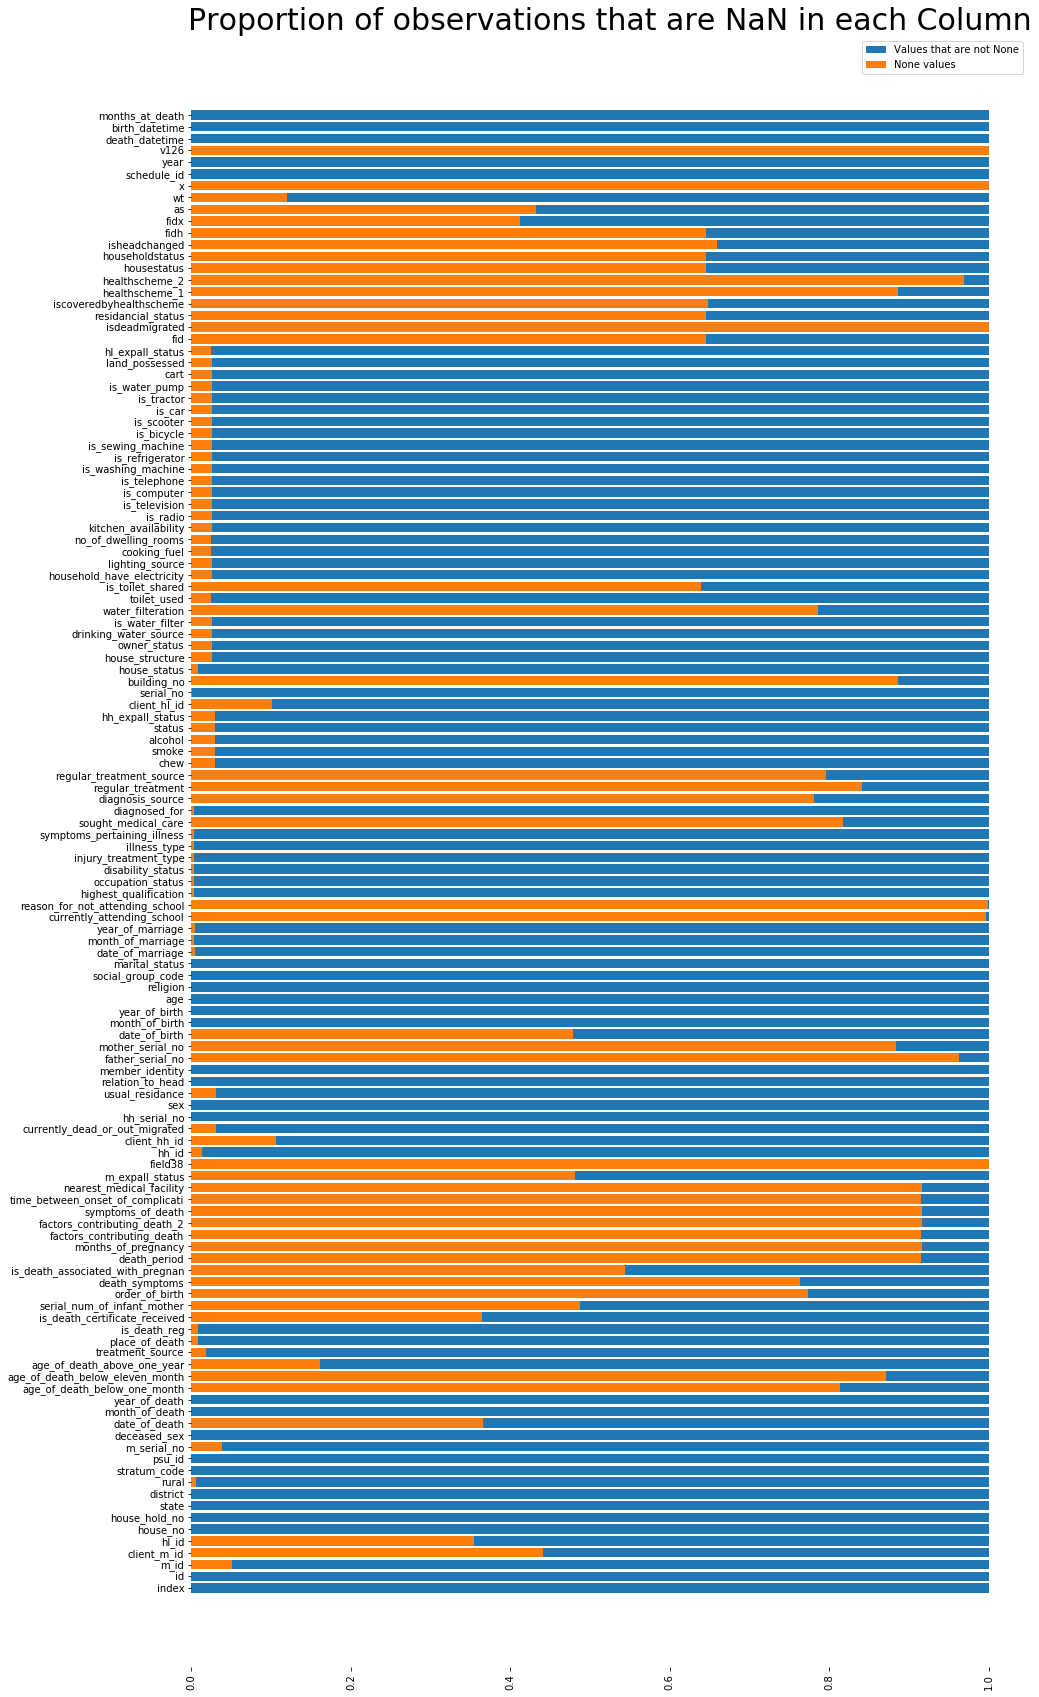

In [46]:
def nan_plot(df):
    none = df == -1
    nanpercentage = none.apply(sum, axis=0)/df.shape[0]
    plt.figure(figsize=(15,30))
    plt.xticks(rotation='vertical')
    plt.barh(nanpercentage.index, 1, label='Values that are not None')
    plt.barh(nanpercentage.index, nanpercentage, label='None values')
    plt.legend()
    sns.despine(bottom=True, left=True)
    plt.title('Proportion of observations that are NaN in each Column', size=30)

nan_plot(indians2)


As we see, some columns have no or almost no values that are not None. I will drop those columns.

In [47]:
indians2 = indians2.drop(['v126','x','isdeadmigrated','reason_for_not_attending_school','currently_attending_school'\
                          ,'field38'], axis=1)

Other columns are directly connected with the death of a person. We can not know them when predicting the age of death of somebody that didn't die yet. Thus I hereby delete those columns.

In [48]:
indians2 = indians2.drop(['diagnosis_source','diagnosed_for','sought_medical_care',\
                          'nearest_medical_facility','time_between_onset_of_complicati',\
                          'symptoms_of_death','factors_contributing_death_2','factors_contributing_death',\
                          'months_of_pregnancy','death_period','is_death_associated_with_pregnan','death_symptoms',\
                          'is_death_certificate_received','is_death_reg','place_of_death','treatment_source',\
                          'age_of_death_above_one_year','age_of_death_below_eleven_month','age_of_death_below_one_month',\
                          'date_of_death'], axis=1)

In [49]:
indians2.head()

,index,id,m_id,client_m_id,hl_id,house_no,house_hold_no,state,district,rural,stratum_code,psu_id,m_serial_no,deceased_sex,month_of_death,year_of_death,serial_num_of_infant_mother,order_of_birth,m_expall_status,hh_id,client_hh_id,currently_dead_or_out_migrated,hh_serial_no,sex,usual_residance,relation_to_head,member_identity,father_serial_no,mother_serial_no,date_of_birth,month_of_birth,year_of_birth,age,religion,social_group_code,marital_status,date_of_marriage,month_of_marriage,year_of_marriage,highest_qualification,occupation_status,disability_status,injury_treatment_type,illness_type,symptoms_pertaining_illness,regular_treatment,regular_treatment_source,chew,smoke,alcohol,status,hh_expall_status,client_hl_id,serial_no,building_no,house_status,house_structure,owner_status,drinking_water_source,is_water_filter,water_filteration,toilet_used,is_toilet_shared,household_have_electricity,lighting_source,cooking_fuel,no_of_dwelling_rooms,kitchen_availability,is_radio,is_television,is_computer,is_telephone,is_washing_machine,is_refrigerator,is_sewing_machine,is_bicycle,is_scooter,is_car,is_tractor,is_water_pump,cart,land_possessed,hl_expall_status,fid,residancial_status,iscoveredbyhealthscheme,healthscheme_1,healthscheme_2,housestatus,householdstatus,isheadchanged,fidh,fidx,as,wt,schedule_id,year,death_datetime,birth_datetime,months_at_death
2,2,109886,246,-1,-1,58,1,9,62,1,2,100281885,1,1,7,2011,0,0,-1,40051,-1,2,2,2,1,1,277,-1,-1,6.0,12,1954,57,1,1,3,0,6,1974,3,2,0,0,0,99,-1,0,7,4,4,0,1,-1,62,0,1,1,1,3,2,-1,0,-1,1,2,3,4,2,1,2,3,2,2,2,2,1,2,2,2,2,4,2,1,962034005801,1,2,0,0,1,1,1,9.62034e+13,-1,-1,20.95,4,3,2011-07-01,1954-12-01,679
27,27,109926,269,-1,-1,234,1,9,62,1,2,100282404,4,1,6,2011,0,0,-1,46152,-1,2,1,1,1,1,1218,-1,-1,4.0,7,1976,35,1,1,3,21,5,1993,8,7,0,0,0,5,2,8,7,4,4,0,1,-1,257,0,1,3,1,3,2,-1,0,-1,1,2,3,1,2,2,2,3,2,2,2,2,1,1,2,2,2,4,2,1,962036023401,1,2,0,0,1,1,2,9.62036e+13,-1,-1,20.95,4,3,2011-06-01,1976-07-01,419
33,33,109910,163,-1,-1,9,1,9,62,1,2,100281128,1,2,7,2011,0,0,-1,42815,-1,2,1,1,1,1,33,-1,-1,2.0,2,1962,49,1,3,3,7,5,1981,4,4,0,0,0,4,2,10,5,4,4,0,1,-1,9,0,1,1,1,3,2,-1,0,-1,2,2,1,3,2,2,2,3,2,2,2,2,1,2,2,2,2,4,2,1,962035000901,1,2,0,0,1,1,2,9.62035e+13,-1,-1,20.95,4,3,2011-07-01,1962-02-01,593
35,35,109894,254,-1,-1,274,1,9,62,1,2,100281923,8,2,8,2011,2,4,-1,41294,-1,2,1,1,1,1,1404,-1,-1,12.0,1,1979,32,1,1,3,6,6,1995,7,1,0,0,0,99,-1,0,5,4,4,0,1,-1,305,0,1,3,1,3,2,-1,0,-1,1,2,3,1,2,2,1,3,1,2,2,2,1,2,2,2,2,2,2,1,962034027401,1,2,0,0,1,1,2,9.62034e+13,-1,-1,20.95,4,3,2011-08-01,1979-01-01,391
37,37,712152,295,-1,2124,117,1,9,58,1,1,100270501,21,2,2,2008,0,0,-1,9767,-1,2,1,1,1,1,641,-1,-1,2.0,1,1968,41,1,3,3,2,6,1986,7,1,0,0,0,10,2,8,3,4,2,0,1,-1,148,0,1,1,1,3,2,-1,0,-1,1,2,2,1,2,2,2,2,2,2,1,1,2,2,2,2,2,4,2,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2.1241e+10,1.89342,68.37,4,1,2008-02-01,1968-01-01,481


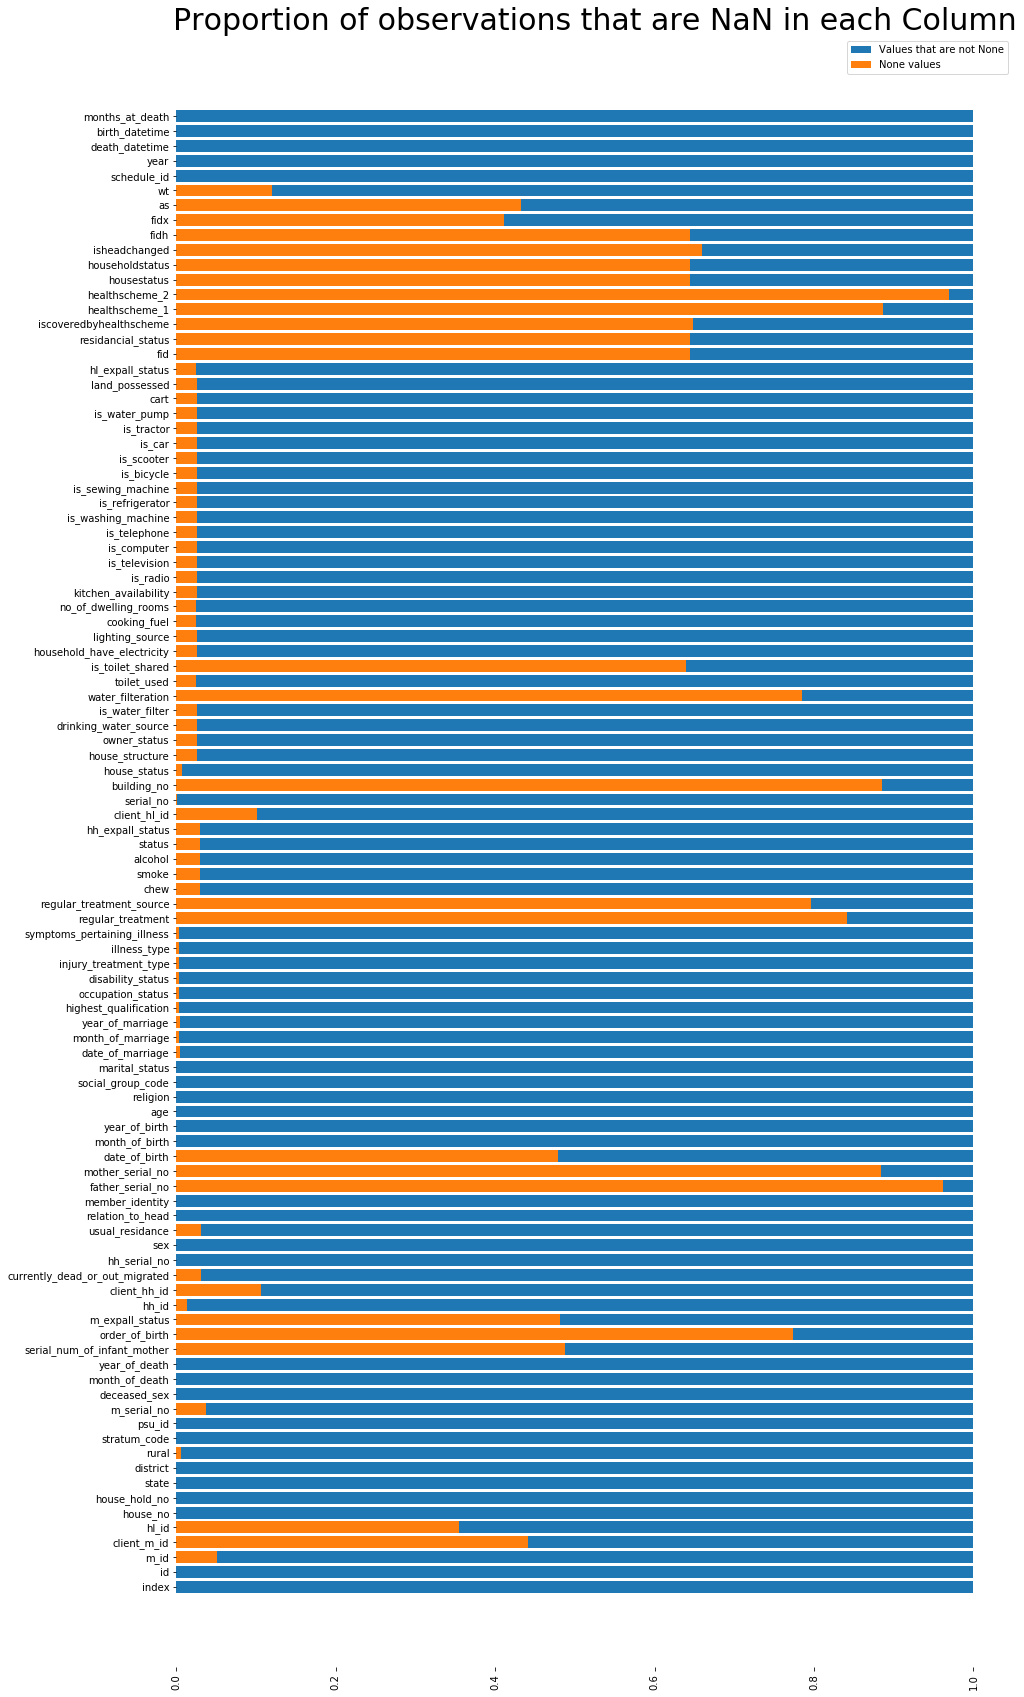

In [50]:
nan_plot(indians2)

Many columns consist of only serial numbers/ids or I wasn't able to find out what those columns are about. I will drop them. Furthermore I'll drop the 'death_datetime' and 'birth_datetime' columns which I don't need anymore.

In [51]:
indians2 = indians2.drop(['schedule_id','fidx','fidh','fid','building_no','serial_no','client_hl_id',\
                          'hh_expall_status','status','mother_serial_no','father_serial_no','client_hh_id',\
                          'hh_serial_no','m_expall_status','serial_num_of_infant_mother','m_serial_no',\
                          'psu_id','stratum_code','house_hold_no','house_no','hl_id','client_m_id','m_id','hh_id',\
                          'id','index','hl_expall_status','member_identity','birth_datetime','death_datetime'],axis=1)

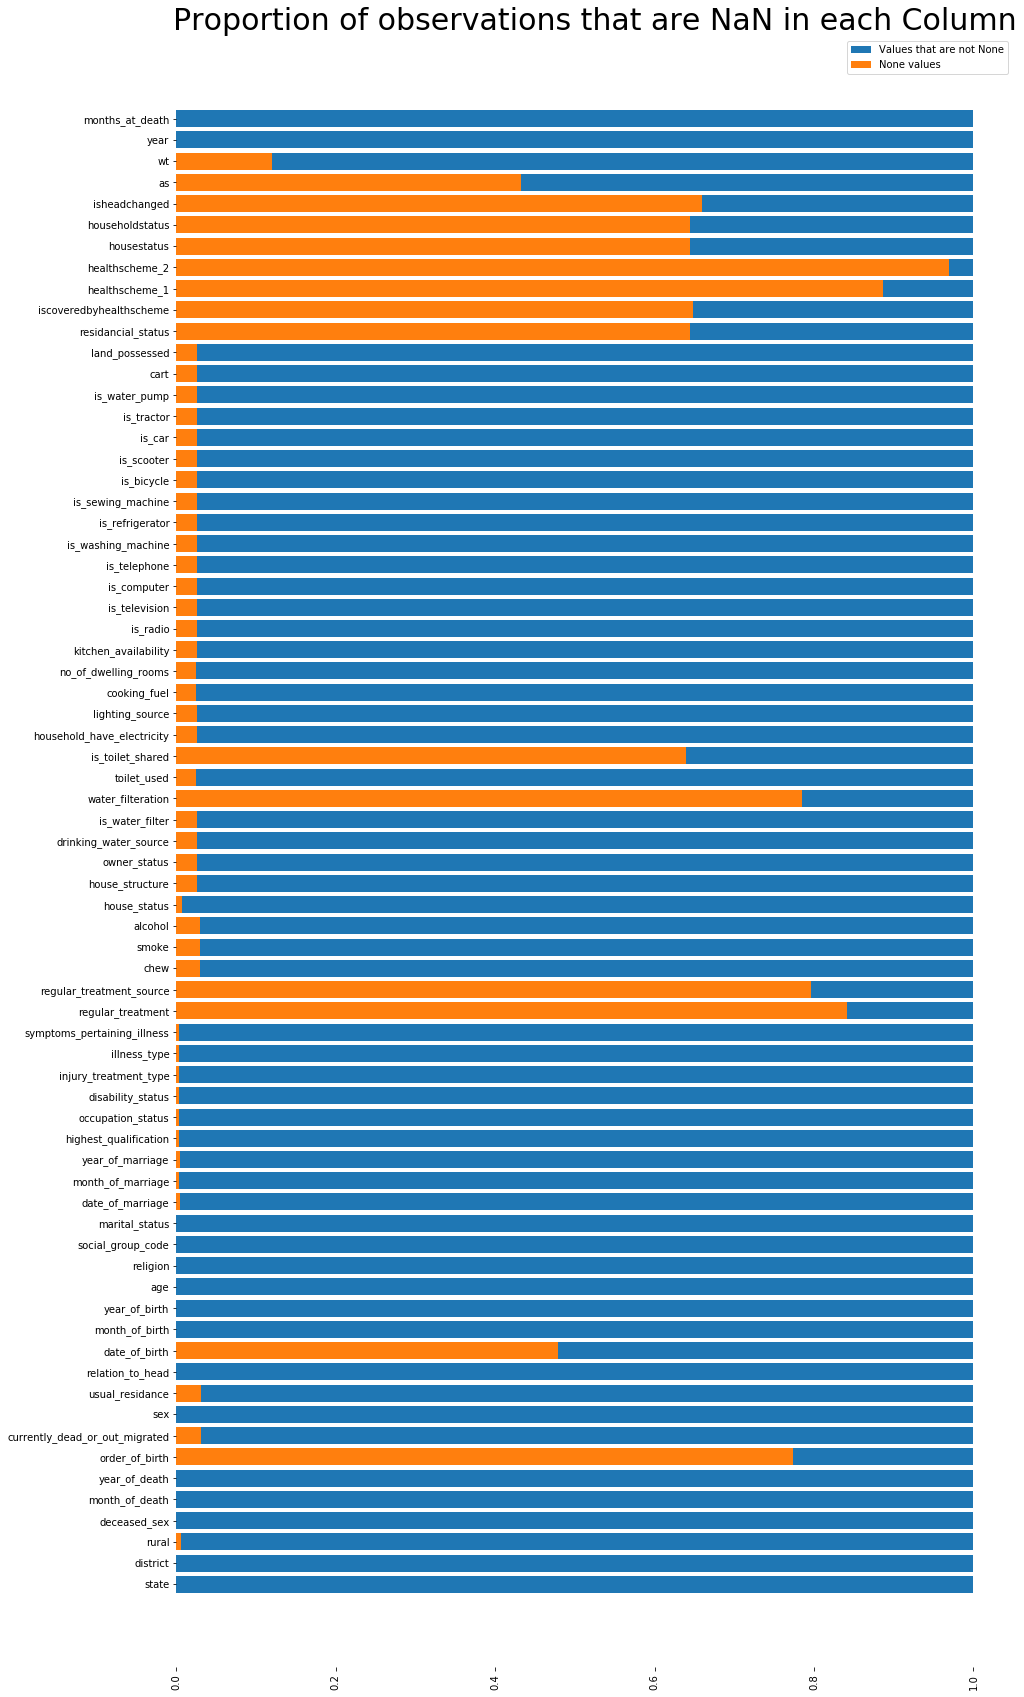

In [52]:
nan_plot(indians2)

In [53]:
nans = indians2 == -1

In [54]:
cols_with_nan_nr = sum(nans.apply(sum) != 0)
cols_with_nan_nr

56

For finding out how best to deal with the remaining Nan values, I need to find out how they are distributed among rows. Thus, I'll make a histogram about it.

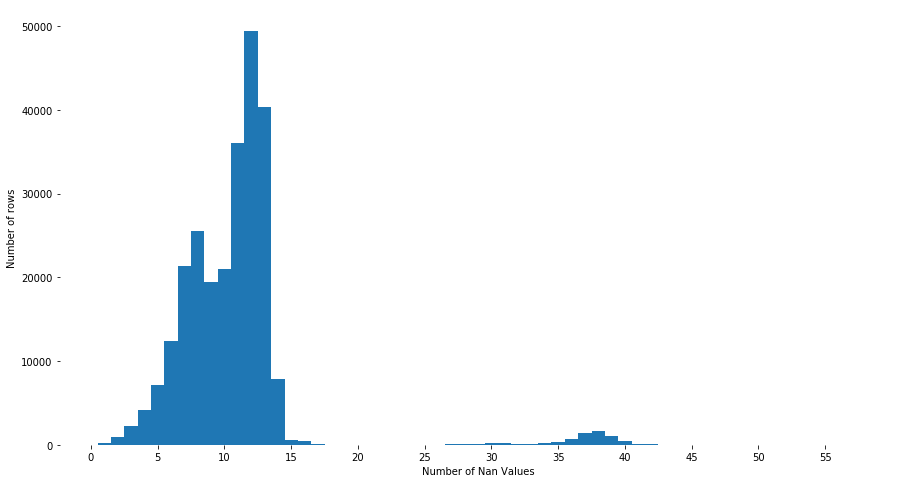

In [55]:
def nan_hist(df):
    nans = df == -1
    nan_nr_for_each_row = nans.apply(sum,axis=1)
    plt.figure(figsize=(15,8))
    plt.hist(nan_nr_for_each_row, bins=np.arange(0.5,58,1))
    sns.despine(bottom=True, left=True)
    plt.ylabel('Number of rows')
    plt.xlabel('Number of Nan Values')
    plt.xticks(np.arange(0,56,5))
    
nan_hist(indians2)

It turns out that the majority of Nan values are distributed among rows that have less than 15 None Values, while there are 56 columns that contain None values. Let's see how this distribution changes when we remove all columns with a substantial amount of Nan values.

In [56]:
indians2 = indians2.drop(['order_of_birth','date_of_birth','regular_treatment','regular_treatment_source',\
                              'water_filteration','is_toilet_shared','residancial_status','iscoveredbyhealthscheme',\
                              'healthscheme_1','healthscheme_2','housestatus','householdstatus','isheadchanged','as',\
                              'wt'],axis=1)

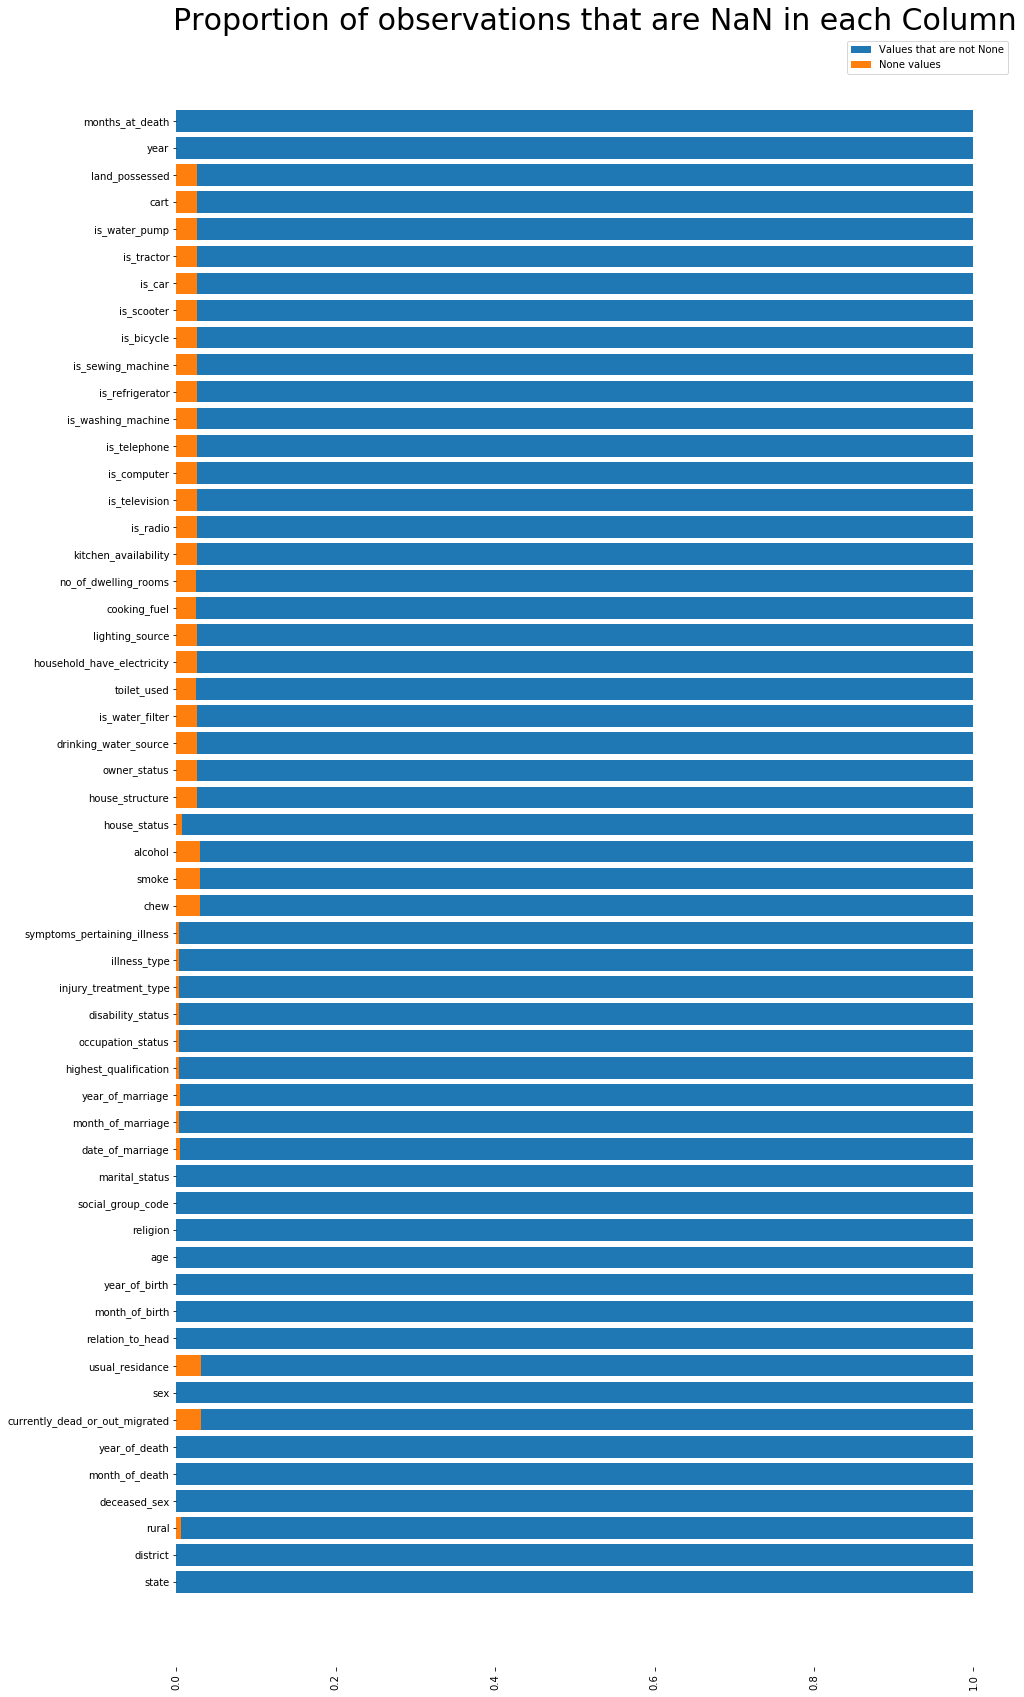

In [57]:
nan_plot(indians2)

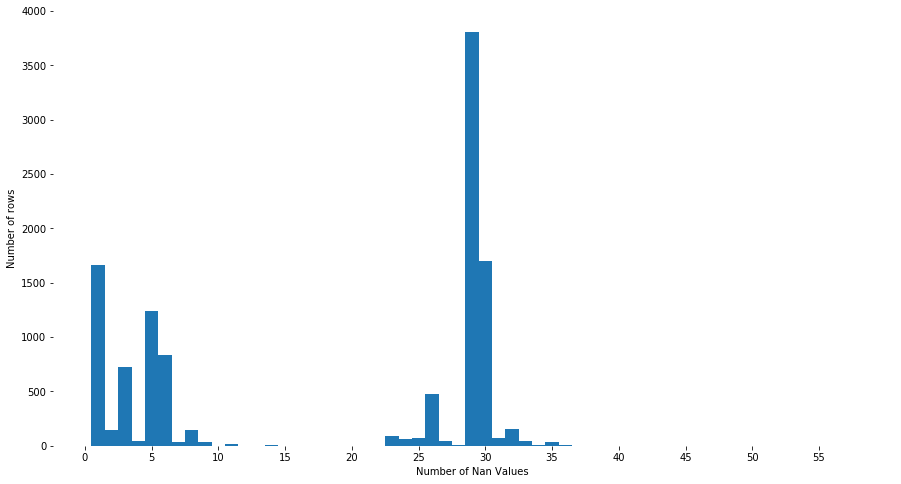

In [58]:
nan_hist(indians2)

Now, the majority of all None values are in rows with more than 22 None values. Thus we will probably not lose that many rows if we drop all rows that have at least one nan value.

In [59]:
indians2.shape

(255849, 55)

In [60]:
nan_mask = indians2 == -1

In [61]:
indians2[nan_mask.apply(sum, axis=1) == 0].shape

(244391, 55)

In [62]:
indians2 = indians2[nan_mask.apply(sum, axis=1) == 0]

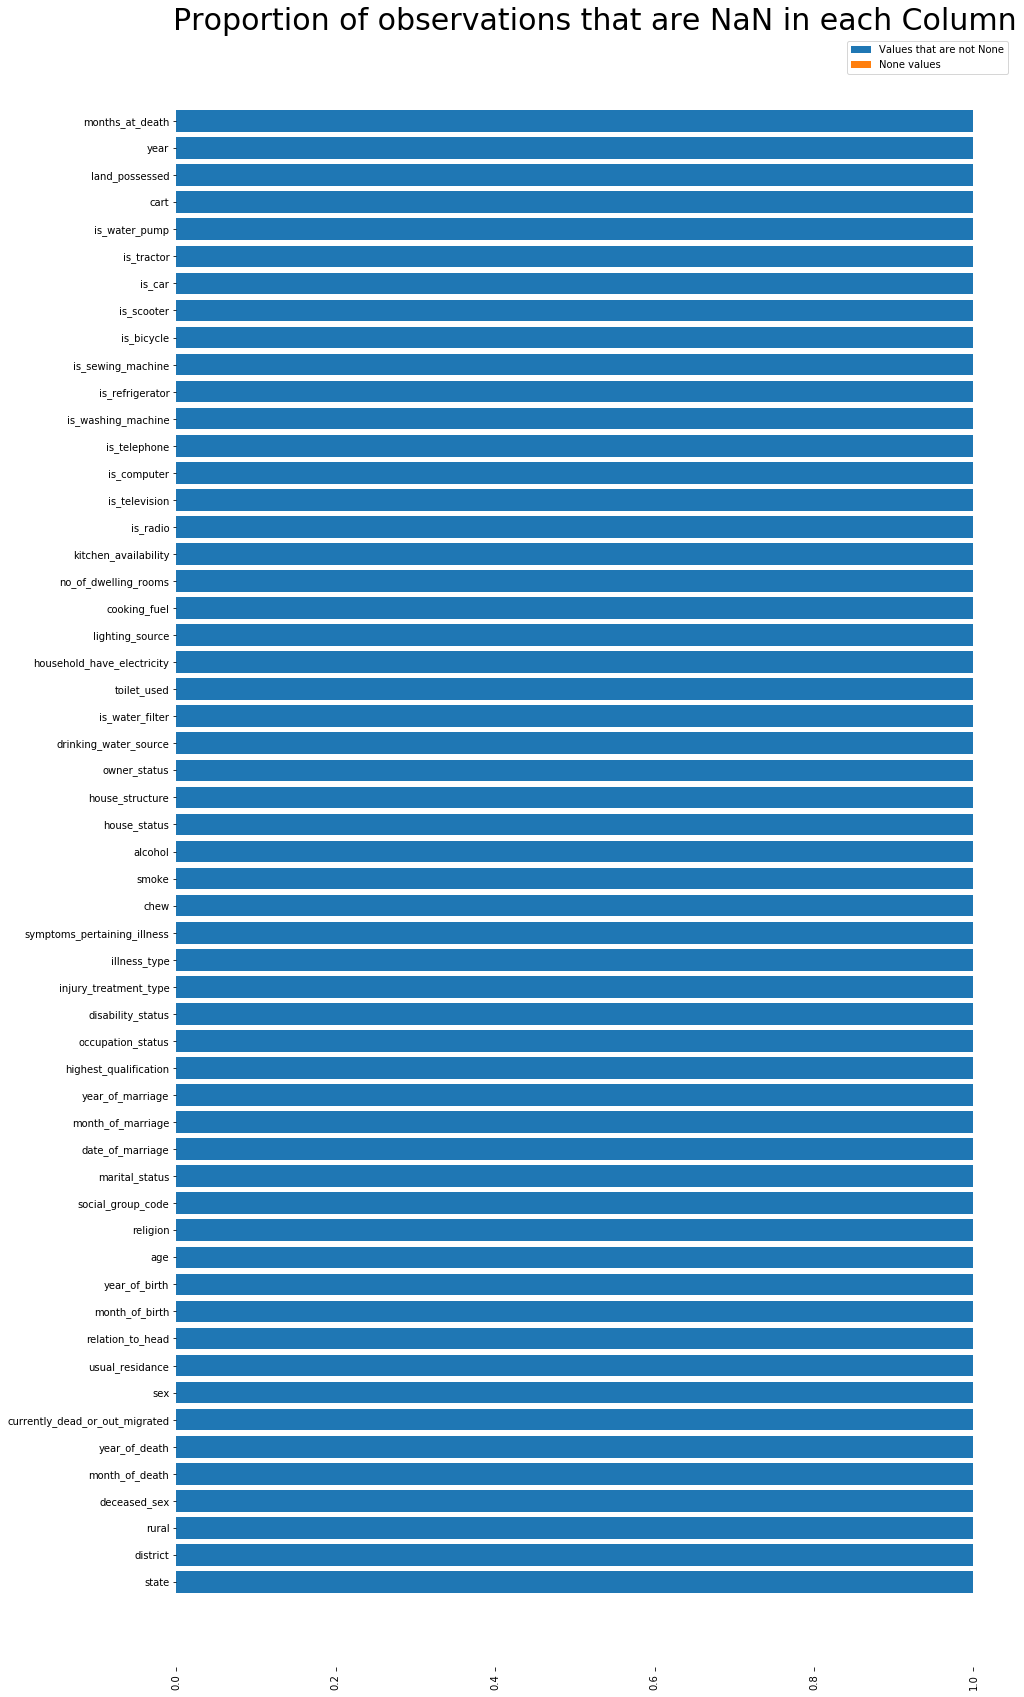

In [63]:
nan_plot(indians2)

In [64]:
indians2.head()


,state,district,rural,deceased_sex,month_of_death,year_of_death,currently_dead_or_out_migrated,sex,usual_residance,relation_to_head,month_of_birth,year_of_birth,age,religion,social_group_code,marital_status,date_of_marriage,month_of_marriage,year_of_marriage,highest_qualification,occupation_status,disability_status,injury_treatment_type,illness_type,symptoms_pertaining_illness,chew,smoke,alcohol,house_status,house_structure,owner_status,drinking_water_source,is_water_filter,toilet_used,household_have_electricity,lighting_source,cooking_fuel,no_of_dwelling_rooms,kitchen_availability,is_radio,is_television,is_computer,is_telephone,is_washing_machine,is_refrigerator,is_sewing_machine,is_bicycle,is_scooter,is_car,is_tractor,is_water_pump,cart,land_possessed,year,months_at_death
2,9,62,1,1,7,2011,2,2,1,1,12,1954,57,1,1,3,0,6,1974,3,2,0,0,0,99,7,4,4,1,1,1,3,2,0,1,2,3,4,2,1,2,3,2,2,2,2,1,2,2,2,2,4,2,3,679
27,9,62,1,1,6,2011,2,1,1,1,7,1976,35,1,1,3,21,5,1993,8,7,0,0,0,5,7,4,4,1,3,1,3,2,0,1,2,3,1,2,2,2,3,2,2,2,2,1,1,2,2,2,4,2,3,419
33,9,62,1,2,7,2011,2,1,1,1,2,1962,49,1,3,3,7,5,1981,4,4,0,0,0,4,5,4,4,1,1,1,3,2,0,2,2,1,3,2,2,2,3,2,2,2,2,1,2,2,2,2,4,2,3,593
35,9,62,1,2,8,2011,2,1,1,1,1,1979,32,1,1,3,6,6,1995,7,1,0,0,0,99,5,4,4,1,3,1,3,2,0,1,2,3,1,2,2,1,3,1,2,2,2,1,2,2,2,2,2,2,3,391
37,9,58,1,2,2,2008,2,1,1,1,1,1968,41,1,3,3,2,6,1986,7,1,0,0,0,10,3,4,2,1,1,1,3,2,0,1,2,2,1,2,2,2,2,2,2,1,1,2,2,2,2,2,4,2,1,481


The values of most columns are not very human-readable right now - they are integer values corresponding to categories. Strings would be far more informative. In order to change the categorical integers to more informative strings I will use the information from a file describing the various variables.

In [65]:
info = pd.read_excel('Mortality_data_dictionary.xlsx', sheet_name='Mortality')
info

,Field Order,Field Name,Field Descriptions,Codes Used,Schedule Code,Col. Nos,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,Baseline,First Updation,Second Updation
1,1,Id,NaN,NaN,NaN,NaN,NaN,NaN
2,2,m_id,NaN,NaN,NaN,NaN,NaN,NaN
3,3,client_m_id,NaN,NaN,NaN,NaN,NaN,NaN
4,4,hl_id,NaN,NaN,NaN,NaN,NaN,NaN
5,5,house_no,House Number,None,M,2,2,2
6,6,house_hold_no,Household Number,None,M,3,3,3
7,7,state,State,"Uttarakhand-05, \nRajasthan-08, \nUttar Prades...",M,Top of Schedule,Top of Schedule,Top of Schedule
8,8,district,District,"code 01-13 when [state code] = 05,\ncode 01-32...",M,Top of Schedule,Top of Schedule,Top of Schedule
9,9,rural,Rural/Urban,"Rural-1, Urban-2",M,Top of Schedule,Top of Schedule,Top of Schedule


In [66]:
info = info.set_index('Field Name')

In [67]:
info = info['Codes Used']

In [68]:
convert_dict = {}
for i in indians2.columns:
    if i in info.index:
        convert_dict[i] = info[i]
    else:
        convert_dict[i] = 'Nothing'

In [69]:
for key in convert_dict:
    if convert_dict[key] != 'Nothing' and isinstance(convert_dict[key],str):
        convert_dict[key] = convert_dict[key].split(',')
        convert_dict[key] = [string.strip().replace('=','-').split('-') for string in convert_dict[key]]
        
delete = []
for key in convert_dict:
    if convert_dict[key] == 'Nothing' or convert_dict[key] == [['None']]:
        delete.append(key)

for val in delete:
    del convert_dict[val]
    
del convert_dict['district']

In [70]:
convert_dict['occupation_status'][9] += convert_dict['occupation_status'][10]
del convert_dict['occupation_status'][10]
convert_dict['occupation_status'][12] += convert_dict['occupation_status'][13] + convert_dict['occupation_status'][14]
del convert_dict['occupation_status'][13]
del convert_dict['occupation_status'][14]
convert_dict['disability_status'][6] = ['No Disability','0']
convert_dict['disability_status'].append(['Others','7'])
del convert_dict['symptoms_pertaining_illness'][9]
del convert_dict['symptoms_pertaining_illness'][9]
convert_dict['symptoms_pertaining_illness'][13] = ['No Symptoms of chronic diseases','99']
del convert_dict['symptoms_pertaining_illness'][-1]
convert_dict['house_status'][2] = ['Vacant','3']
convert_dict['house_status'].append(['New House','4'])
convert_dict['toilet_used'][8] = ['open defecation','0']
del convert_dict['toilet_used'][9]
del convert_dict['toilet_used'][9]
del convert_dict['toilet_used'][9]

In [71]:
convert_dict['toilet_used']

[['Flush/Pour flush latrine connected:', 'To piped sewer system', '1'],
 ['To septic tank', '2'],
 ['To pit latrine', '3'],
 ['To somewhere else', '4'],
 ['Pit latrine(without flush/ pour flush):',
  'Ventilated Improved Pit (VIP)',
  '5'],
 ['Pit latrine with slab', '6'],
 ['Open pit /Pit latrine without slab', '7'],
 ['service latrine', '8'],
 ['open defecation', '0']]

In [72]:
for key in convert_dict:
    in_dict = {}
    if isinstance(convert_dict[key],list):
        for sublist in convert_dict[key]:
            in_dict[int(sublist[-1])] = sublist[0]
            if len(sublist) > 2:
                for i in range(1,len(sublist)-1):
                    in_dict[int(sublist[-1])] += '_'+ sublist[i]
        convert_dict[key] = in_dict

In [73]:
convert_dict

{'state': {5: 'Uttarakhand',
  8: 'Rajasthan',
  9: 'Uttar Pradesh',
  10: 'Bihar',
  18: 'Assam',
  20: 'Jharkhand',
  21: 'Odisha',
  22: 'Chhattisgarh',
  23: 'Madhya Pradesh'},
 'rural': {1: 'Rural', 2: 'Urban'},
 'deceased_sex': {1: 'Male', 2: 'Female'},
 'currently_dead_or_out_migrated': nan,
 'sex': {1: 'Male', 2: 'Female'},
 'usual_residance': {1: 'Yes', 2: 'No'},
 'relation_to_head': {1: 'Head',
  2: 'Wife or Husband',
  3: 'Son or Daughter',
  4: 'Son_in_law or Daughter_in_law',
  5: 'Grandchild',
  6: 'Parent',
  7: 'Parent_in_law',
  8: 'Brother or Sister',
  9: 'Brother_in_law or Sister_in_law',
  10: 'Niece or Nephew',
  11: 'Other relatives',
  12: 'Adopted /foster child',
  13: 'No related'},
 'religion': {1: 'Hindu',
  2: 'Muslim',
  3: 'Christian',
  4: 'Sikh',
  5: 'Buddhist',
  6: 'Jain',
  7: 'Others',
  8: 'No religion'},
 'social_group_code': {1: 'SC', 2: 'ST', 3: 'Others'},
 'marital_status': {1: 'Never married',
  2: 'Married but Gauna not performed',
  3: 'Mar

In [74]:
indians2.head()

,state,district,rural,deceased_sex,month_of_death,year_of_death,currently_dead_or_out_migrated,sex,usual_residance,relation_to_head,month_of_birth,year_of_birth,age,religion,social_group_code,marital_status,date_of_marriage,month_of_marriage,year_of_marriage,highest_qualification,occupation_status,disability_status,injury_treatment_type,illness_type,symptoms_pertaining_illness,chew,smoke,alcohol,house_status,house_structure,owner_status,drinking_water_source,is_water_filter,toilet_used,household_have_electricity,lighting_source,cooking_fuel,no_of_dwelling_rooms,kitchen_availability,is_radio,is_television,is_computer,is_telephone,is_washing_machine,is_refrigerator,is_sewing_machine,is_bicycle,is_scooter,is_car,is_tractor,is_water_pump,cart,land_possessed,year,months_at_death
2,9,62,1,1,7,2011,2,2,1,1,12,1954,57,1,1,3,0,6,1974,3,2,0,0,0,99,7,4,4,1,1,1,3,2,0,1,2,3,4,2,1,2,3,2,2,2,2,1,2,2,2,2,4,2,3,679
27,9,62,1,1,6,2011,2,1,1,1,7,1976,35,1,1,3,21,5,1993,8,7,0,0,0,5,7,4,4,1,3,1,3,2,0,1,2,3,1,2,2,2,3,2,2,2,2,1,1,2,2,2,4,2,3,419
33,9,62,1,2,7,2011,2,1,1,1,2,1962,49,1,3,3,7,5,1981,4,4,0,0,0,4,5,4,4,1,1,1,3,2,0,2,2,1,3,2,2,2,3,2,2,2,2,1,2,2,2,2,4,2,3,593
35,9,62,1,2,8,2011,2,1,1,1,1,1979,32,1,1,3,6,6,1995,7,1,0,0,0,99,5,4,4,1,3,1,3,2,0,1,2,3,1,2,2,1,3,1,2,2,2,1,2,2,2,2,2,2,3,391
37,9,58,1,2,2,2008,2,1,1,1,1,1968,41,1,3,3,2,6,1986,7,1,0,0,0,10,3,4,2,1,1,1,3,2,0,1,2,2,1,2,2,2,2,2,2,1,1,2,2,2,2,2,4,2,1,481


In [75]:
for colname in indians2.columns:
    indians2[colname] = pd.to_numeric(indians2[colname])

In [76]:
for key in convert_dict:
    indians2[key] = indians2[key].replace(convert_dict[key])

In [78]:
indians2.head()

,state,district,rural,deceased_sex,month_of_death,year_of_death,currently_dead_or_out_migrated,sex,usual_residance,relation_to_head,month_of_birth,year_of_birth,age,religion,social_group_code,marital_status,date_of_marriage,month_of_marriage,year_of_marriage,highest_qualification,occupation_status,disability_status,injury_treatment_type,illness_type,symptoms_pertaining_illness,chew,smoke,alcohol,house_status,house_structure,owner_status,drinking_water_source,is_water_filter,toilet_used,household_have_electricity,lighting_source,cooking_fuel,no_of_dwelling_rooms,kitchen_availability,is_radio,is_television,is_computer,is_telephone,is_washing_machine,is_refrigerator,is_sewing_machine,is_bicycle,is_scooter,is_car,is_tractor,is_water_pump,cart,land_possessed,year,months_at_death
2,Uttar Pradesh,62,Rural,Male,7,2011,2.0,Female,Yes,Head,12,1954,57.0,Hindu,SC,Married and Gauna performed,0.0,6.0,1974.0,Literate With formal education_Primary,Agricultural Wage labourer,No Disability,No Injury,No Illness,No Symptoms of chronic diseases,Never chewed,Never smoked,Never drank,Residential/partly residential,Pucca,Owned,Hand pump,No,open defecation,Yes,Kerosene,Cow dung cake,4.0,Does not have kitchen,Yes,No,No,Mobile Phone only,No,No,No,Yes,No,No,No,No,Doesn't have,0.02 to less than 1.00,3,679
27,Uttar Pradesh,62,Rural,Male,6,2011,2.0,Male,Yes,Head,7,1976,35.0,Hindu,SC,Married and Gauna performed,21.0,5.0,1993.0,Literate With formal education_Post Grad/ M.Te...,Regular salaried/wage employees,No Disability,No Injury,No Illness,Diseases of gastrointestinal system,Never chewed,Never smoked,Never drank,Residential/partly residential,Kuccha,Owned,Hand pump,No,open defecation,Yes,Kerosene,Cow dung cake,1.0,Does not have kitchen,No,No,No,Mobile Phone only,No,No,No,Yes,Yes,No,No,No,Doesn't have,0.02 to less than 1.00,3,419
33,Uttar Pradesh,62,Rural,Female,7,2011,2.0,Male,Yes,Head,2,1962,49.0,Hindu,Others,Married and Gauna performed,7.0,5.0,1981.0,Literate With formal education_Middle,Self_Employed(excluding cultivators)Own Accoun...,No Disability,No Injury,No Illness,Diseases of musculo_skeletal system,Tobacco only,Never smoked,Never drank,Residential/partly residential,Pucca,Owned,Hand pump,No,open defecation,No,Kerosene,Firewood,3.0,Does not have kitchen,No,No,No,Mobile Phone only,No,No,No,Yes,No,No,No,No,Doesn't have,0.02 to less than 1.00,3,593
35,Uttar Pradesh,62,Rural,Female,8,2011,2.0,Male,Yes,Head,1,1979,32.0,Hindu,SC,Married and Gauna performed,6.0,6.0,1995.0,Literate With formal education _ Graduate/ B.T...,Cultivator,No Disability,No Injury,No Illness,No Symptoms of chronic diseases,Tobacco only,Never smoked,Never drank,Residential/partly residential,Kuccha,Owned,Hand pump,No,open defecation,Yes,Kerosene,Cow dung cake,1.0,Does not have kitchen,No,Yes,No,Telephone only,No,No,No,Yes,No,No,No,No,Driven by Machine,0.02 to less than 1.00,3,391
37,Uttar Pradesh,58,Rural,Female,2,2008,2.0,Male,Yes,Head,1,1968,41.0,Hindu,Others,Married and Gauna performed,2.0,6.0,1986.0,Literate With formal education _ Graduate/ B.T...,Cultivator,No Disability,No Injury,No Illness,(Eye Problem/diseases,Gutka/Pan masala with tobacco,Never smoked,Occasional drinker,Residential/partly residential,Pucca,Owned,Hand pump,No,open defecation,Yes,Kerosene,Crop Residue,1.0,Does not have kitchen,No,No,Without Internet connection,Mobile Phone only,No,Yes,Yes,No,No,No,No,No,Doesn't have,0.02 to less than 1.00,1,481


In [77]:
indians2.to_csv('indians.csv')